[[ 0.7717444  -0.54808576]
 [ 0.18941605 -0.26198166]
 [ 0.91835906  0.44327651]
 [ 1.02121324 -0.4885232 ]
 [ 1.17844152 -0.36919255]
 [-1.06269109  0.11620227]
 [ 1.23450807 -0.46158935]
 [ 0.71183872 -0.39301214]
 [ 0.54248925  0.82446369]
 [-0.75247142  0.82890764]
 [ 1.90170845  0.24242119]
 [ 0.90484961  0.31276948]
 [ 0.21073699 -0.29452606]
 [ 1.4110975  -0.60207801]
 [ 0.95685564  0.28719718]
 [-0.09989627  1.00516094]
 [ 1.74485967  0.08024536]
 [-0.45030918  0.97377632]
 [ 1.09080974 -0.61231159]
 [ 0.0955788   0.19193023]
 [ 0.41223736 -0.16454486]
 [-0.3490686   0.958475  ]
 [-0.9011812   0.47910228]
 [-0.80243244  0.47482963]
 [ 1.01132627 -0.66030669]
 [-0.76998083  0.56718813]
 [ 0.42833125 -0.31006902]
 [ 2.05368745  0.26104244]
 [ 1.27759897 -0.52664827]
 [ 1.90200103  0.37475692]
 [-0.36236538  0.97061124]
 [ 0.40419141  0.97975761]
 [ 0.89021338  0.13327922]
 [-0.88864787  0.58717548]
 [ 0.73021521 -0.48695741]
 [ 0.01565065  0.5232181 ]
 [ 0.08680305 -0.04494177]
 

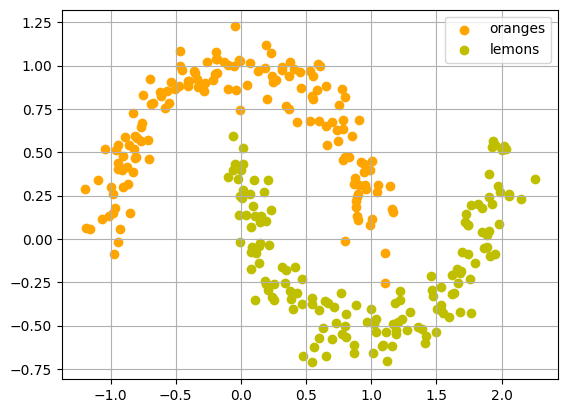

In [331]:
import numpy as np
import matplotlib.pyplot as plt

def points_within_circle(radius, 
                         center=(0, 0),
                         number_of_points=100):
    center_x, center_y = center
    r = radius * np.sqrt(np.random.random((number_of_points,)))
    theta = np.random.random((number_of_points,)) * 2 * np.pi
    x = center_x + r * np.cos(theta)
    y = center_y + r * np.sin(theta)
    return x, y


# half moon data import sklearn
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=300, noise=0.1, random_state=0)

print(X)
print(y)
# make the set of the abscisses of X that have y=1
X0 = X[y==1]
print(X1)
# make the set of the abscisses of X that have y=0
X1 = X[y==0]
print("sep")
haut_x = X1[:,0]
haut_x2 = haut_x ** 2
haut_x3 = haut_x ** 3
haut_y = X1[:,1]
haut_b = np.ones(len(haut_x))

bas_x = X0[:,0]
bas_x2 = bas_x ** 2
bas_x3 = bas_x ** 3
bas_y = X0[:,1]
bas_b = np.ones(len(bas_x))
print(haut_x)



fig, ax = plt.subplots()
""" 
X = np.arange(0, 8)
oranges_x, oranges_y = points_within_circle(1.6, (5, 2), 100)
lemons_x, lemons_y = points_within_circle(1.9, (2, 5), 100)
oranges_x2 = haut_x ** 2
oranges_x3 = oranges_x ** 3
lemons_x2 = lemons_x ** 2
lemons_x3 = lemons_x ** 3
""" 
ax.scatter(haut_x, 
           haut_y,
           c="orange", 
           label="oranges")
ax.scatter(bas_x, 
           bas_y,
           c="y", 
           label="lemons")

#ax.plot(X, 0.9 * X, "g-", linewidth=2)

ax.legend()
ax.grid()
plt.show()

In [332]:
for point in zip(haut_x[:10], haut_x2[:10] , haut_x3[:10] , haut_y[:10], haut_b[:10]):
    res = p(point)
    print(res, end=", ")

for point in zip(bas_x[:10], bas_x2[:10], bas_x3[:10] , bas_y[:10], bas_b[:10]):
    res = p(point)
    print(res, end=", ")

0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [336]:


from collections import Counter
evaluation = Counter()
for point in zip(haut_x, haut_x2, haut_x3 ,haut_y, haut_b):
    res = p(point)
    if res < 0:
        evaluation['corrects'] += 1
    else:
        evaluation['wrongs'] += 1


for point in zip(bas_x, bas_x2,bas_x3, bas_y, bas_b):
    res = p(point)
    if res >= 0:
        evaluation['corrects'] += 1
    else:
        evaluation['wrongs'] += 1

print(evaluation)



Counter({'wrongs': 150, 'corrects': 150})


In [360]:
from sklearn.model_selection import train_test_split
import random

haut = list(zip(haut_x, haut_x2, haut_x3, haut_y, haut_b))
bas = list(zip(bas_x, bas_x2, bas_x3, bas_y, bas_b))

# labelling oranges with 0 and lemons with 1:
labelled_data = list(zip(haut + bas, 
                         [0] * len(haut) + [1] * len(bas)))
random.shuffle(labelled_data)

data, labels = zip(*labelled_data)

res = train_test_split(data, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=42)
train_data, test_data, train_labels, test_labels = res    
print(train_data[:10], train_labels[:10])


[(0.18961855408548733, 0.03595519605347088, 0.00681777228751937, 0.10554816819719548, 1.0), (0.6952574538447298, 0.4833829271266566, 0.33607558314609187, -0.5795205645695247, 1.0), (0.7685025421916967, 0.5905961573551005, 0.4538746483360421, -0.3095748272264467, 1.0), (0.18941604875511783, 0.03587843952600118, 0.006795952250514586, -0.2619816631639887, 1.0), (0.07216062788632342, 0.005207156216948438, 0.0003757516621171718, 1.013371142219903, 1.0), (0.9521784659746745, 0.9066438310658843, 0.8632867322497156, 0.3129658992209601, 1.0), (0.34256534077827516, 0.1173510127025358, 0.04020038965711987, -0.17700913471695018, 1.0), (-0.8626212302327305, 0.7441153868482294, -0.6418897304381239, 0.3172482619869754, 1.0), (1.7172665433659962, 2.9490043809641966, 5.0642265596695655, 0.1002541511190492, 1.0), (1.6967773869875236, 2.8790535009922085, 4.885112876410841, -0.07658249581037413, 1.0)] [1, 1, 1, 1, 0, 0, 1, 0, 1, 1]


train [(0.18961855408548733, 0.03595519605347088, 0.00681777228751937, 0.10554816819719548, 1.0), (0.6952574538447298, 0.4833829271266566, 0.33607558314609187, -0.5795205645695247, 1.0), (0.7685025421916967, 0.5905961573551005, 0.4538746483360421, -0.3095748272264467, 1.0), (0.18941604875511783, 0.03587843952600118, 0.006795952250514586, -0.2619816631639887, 1.0), (0.07216062788632342, 0.005207156216948438, 0.0003757516621171718, 1.013371142219903, 1.0), (0.9521784659746745, 0.9066438310658843, 0.8632867322497156, 0.3129658992209601, 1.0), (0.34256534077827516, 0.1173510127025358, 0.04020038965711987, -0.17700913471695018, 1.0), (-0.8626212302327305, 0.7441153868482294, -0.6418897304381239, 0.3172482619869754, 1.0), (1.7172665433659962, 2.9490043809641966, 5.0642265596695655, 0.1002541511190492, 1.0), (1.6967773869875236, 2.8790535009922085, 4.885112876410841, -0.07658249581037413, 1.0), (0.17962879443525295, 0.032266503790262364, 0.005795993176485348, 0.26892927719826193, 1.0), (-0.05

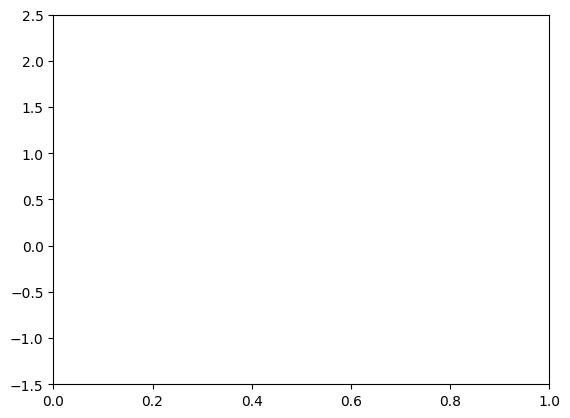

In [366]:
import numpy as np
from collections import Counter




class Perceptron:
    
    def __init__(self, 
                 weights,
                 learning_rate=0.001):
        """
        'weights' can be a numpy array, list or a tuple with the
        actual values of the weights. The number of input values
        is indirectly defined by the length of 'weights'
        """
        self.weights = np.array(weights)
        self.learning_rate = learning_rate
     
    # activation function:
    @staticmethod
    def unit_step_function(x):
        if  x < 0:
            return 0
        else:
            return 1        
        
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return Perceptron.unit_step_function(weighted_sum)
    
    def adjust(self, 
               target_result, 
               calculated_result,
               in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data)  
        error = target_result - calculated_result
        if error != 0: # gradient descent learning rule
            # implement gradient descent here:
            correction = self.learning_rate * error * in_data
            print(" in_data:", in_data)
            print( "correction:", correction)
            print("calculated_result:", calculated_result)


            print( "old weights:", self.weights)

                  
            self.weights += correction
            print( "new weights:", self.weights)
        w1, w2, w3, w4, w5 = self.weights
        a0 = -w1/w4
        a1 = -w2/w4
        a2 = -w3/w4
        b = -w5/w4
        Xp = np.linspace(-1.5, 2, 100)
        #plt.plot(Xp, a0*Xp**3 + a1*Xp**2 + a2*Xp + b)
        #plt.plot(haut_x, haut_y, "o", c="orange")
        #plt.plot(bas_x, bas_y, "o", c="y")
        




    
            

            


             
            
    def evaluate(self, data, labels):
        evaluation = Counter()
        for index in range(len(data)):
            label = int(round(p(data[index]),0))
            if label == labels[index]:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation
                

p = Perceptron(weights = np.random.rand(5),
               learning_rate=0.1)

print("train" ,train_data)
print("label", train_labels)
for index in range(len(train_data)):
    p.adjust(train_labels[index], 
             p(train_data[index]), 
             train_data[index])
    
evaluation = p.evaluate(train_data, train_labels)
print(evaluation.most_common())
evaluation = p.evaluate(test_data, test_labels)
print(evaluation.most_common())

print(p.weights)
# y axis lim
plt.ylim(-1.5, 2.5)
plt.show()



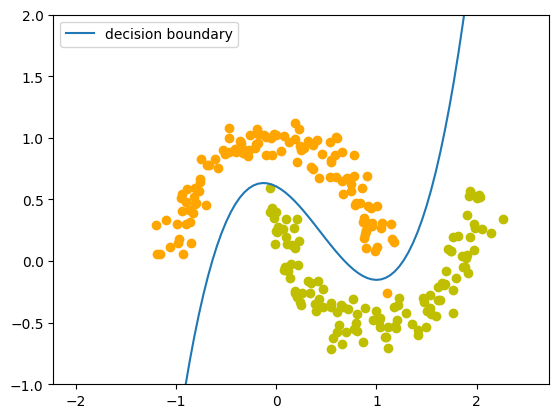

[-0.15321587 -0.52430773  0.40065584 -0.36512727  0.22116596]


In [343]:
import matplotlib.pyplot as plt
import numpy as np

Xp = np.linspace(-2, 2.5, 100)
fig, ax = plt.subplots()

bas = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 1]
bas_x, bas_x2, bas_x3 ,bas_y , bas_b= zip(*bas)
haut = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 0]
haut_x, haut_x2, haut_x3 ,haut_y , haut_b= zip(*haut)

ax.scatter(haut_x, haut_y, c="orange")
ax.scatter(bas_x, bas_y, c="y")

w1 = p.weights[0]
w2 = p.weights[1]
w3 = p.weights[2]
w4 = p.weights[3]
b = -p.weights[4]/w4
a0 = -w1/w4
a1 = -w2/w4
a2 = -w3/w4


ax.plot(Xp, b + a0*Xp + a1*Xp**2 + a2*Xp**3, label="decision boundary")
#set y axis limits
ax.set_ylim([-1, 2])
ax.legend()
plt.show()
print(p.weights)


In [344]:
def vecfield3(x,y):
    if y > b + a0*x + a1*x**2 + a2*x**3:
        return 0,0.5
    else:
        return 0,-0.5




def trajectory3(x,y):
    # Define the step size
    h = 0.1
    # Define the number of steps
    n = 20
    # Create empty lists to store the points
    X = []
    Y = []
    # Add the initial point to the list
    X.append(x)
    Y.append(y)
    # Create a loop to add the next points to the list
    for i in range(n):
        # Define the vector field at the point
        #print( (vecfield2(x,y)))
        #print("x = ", x)
        #print("y = ", y)
        
        u,v = vecfield3(x,y)
        # Define the next point
        x = x + h*u
        y = y + h*v
        # Add the next point to the list
        X.append(x)
        Y.append(y)
    # Return the lists
    return X,Y





[[ 0.7717444   0.18941605  0.91835906  1.02121324  1.17844152 -1.06269109
   1.23450807  0.71183872  0.54248925 -0.75247142  1.90170845  0.90484961
   0.21073699  1.4110975   0.95685564 -0.09989627  1.74485967 -0.45030918
   1.09080974  0.0955788   0.41223736 -0.3490686  -0.9011812  -0.80243244
   1.01132627 -0.76998083  0.42833125  2.05368745  1.27759897  1.90200103
  -0.36236538  0.40419141  0.89021338 -0.88864787  0.73021521  0.01565065
   0.08680305  0.07670231  1.94571385  0.87882994  1.11782695 -0.2583592
  -0.20036443  0.74057557  0.36876065 -0.86262123  1.15876654  0.27168986
   1.00332343  0.65181008 -0.04093824  0.6016032  -0.00358706 -0.67603105
   0.1273955   1.61778129  0.04006928  0.89336998  2.14599409 -0.06324102
  -0.90102868 -1.1995141   0.2290489   1.92280366  1.98538323  0.8849326
   1.61685865 -0.75864584  1.14279007  0.55179722  0.01776385  1.03378394
   1.72281266  0.83047187 -0.92780988  1.53151585  0.78020151 -0.47017635
   0.23827028 -0.99523684 -0.79810499  0

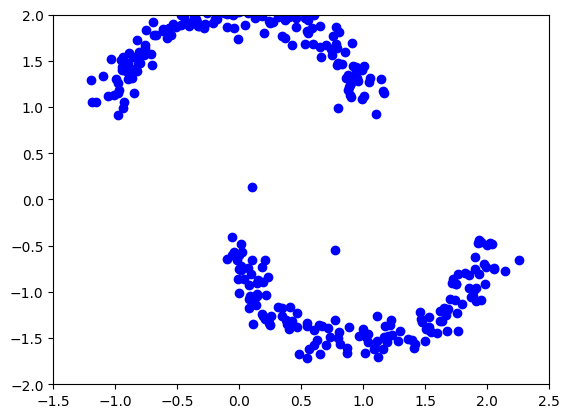

In [345]:
# Animation of the movement of all points of the half moon in a single video
from matplotlib import animation
from IPython.display import HTML

def animeGenAll(X):
    # Define the figure
    fig = plt.figure()
    # Define the axes
    ax = plt.axes(xlim=(-1.5, 2.5), ylim=(-2, 2))
    line, = ax.plot([], [], 'bo',lw=2)
    # Create an empty line
    def init():
        line.set_data([], [])
        return line,
    #define the initial array with the initial positions of all points
    X0 = np.array([X[:,0],X[:,1]])
    print(X0)
    trajArray = np.array([trajectory3(X[i,0],X[i,1]) for i in range(1,len(X)-1)])
    print(trajectory3(X[1,0],X[1,1]))
    print("rrrr")
    print(trajArray[30])
    print("len traj", len(trajArray[0]))
    print("len traj2" , len(trajectory3(X[1,0],X[1,1])[0]))


    # Define the function that will create the animation
    def animate(i):
        print("i = ", i)
        for j in range(1,len(X)-1):
            X0[0,j] = trajArray[j-1][0][i]
            X0[1,j] = trajArray[j-1][1][i]


        line.set_data(X0[0], X0[1])
        return line,

    # Create the animation
    anim = animation.FuncAnimation(fig, animate, frames=len(trajectory3(X[1,0],X[1,1])[0]), interval=20, blit=True, init_func=init)

    # save the animation
    anim.save('animation_test_polyn.mp4', fps=2, extra_args=['-vcodec', 'libx264'])

    plt.show()

    
        
animeGenAll(X)
    

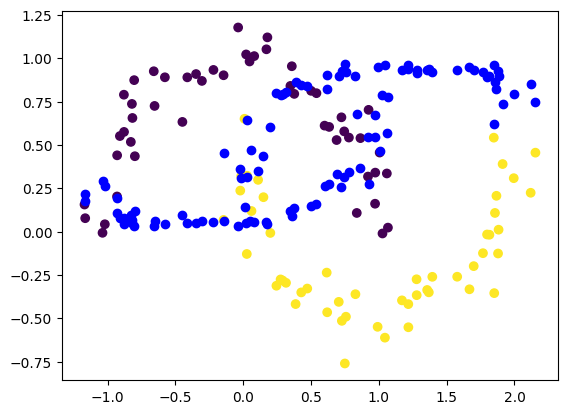

In [330]:
# Other approach with logistic regression
# import modules

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# create the model
model = LogisticRegression()

# define the data (half moon)
X,y = make_moons(n_samples=100, noise=0.1, random_state=1)
plt.scatter(X[:,0], X[:,1], c=y)

# fit the model
model.fit(X,y)

# predict the labels
y_pred = model.predict(X)

# compute the accuracy
accuracy_score(y, y_pred)

# plot the probabilities for each point
y_proba = model.predict_proba(X)
plt.scatter(X[:,0], y_proba[:,1], c="blue")
plt.show()






